In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_cleaned.csv')
data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
data.isnull().sum()/100

Survived      0.0
Age           0.0
Fare          0.0
Pclass_1      0.0
Pclass_2      0.0
Pclass_3      0.0
Sex_female    0.0
Sex_male      0.0
SibSp_0       0.0
SibSp_1       0.0
SibSp_2       0.0
SibSp_3       0.0
SibSp_4       0.0
SibSp_5       0.0
SibSp_8       0.0
Parch_0       0.0
Parch_1       0.0
Parch_2       0.0
Parch_3       0.0
Parch_4       0.0
Parch_5       0.0
Parch_6       0.0
Embarked_C    0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

In [5]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

testing for k = 3

In [12]:
clf = KNN(n_neighbors=3)

#fitting our model
clf.fit(train_x, train_y)

#predicting over test set and calculating F1
test_predict = clf.predict(test_x)
test_F1 = f1_score(test_predict, test_y)
print('F1 score of test set is: ', test_F1)
#predicting over train set and calculating F1
train_predict = clf.predict(train_x)
train_F1 = f1_score(train_predict, train_y)
print('F1 score of train set is: ', train_F1)

F1 score of test set is:  0.7080745341614907
F1 score of train set is:  0.8209255533199196


Visualising the training F1 score and testing F1 score

In [27]:
def visualize(k):
    train_F1_values = []
    test_F1_values = []
    
    for i in k:
        clf = KNN(n_neighbors=i)
        
        clf.fit(train_x, train_y)
        train_predict = clf.predict(train_x)
        train_f1 = f1_score(train_y, train_predict)
        train_F1_values.append(train_f1)
        
        test_predict = clf.predict(test_x)
        test_f1 = f1_score(test_predict, test_y)
        test_F1_values.append(test_f1)
        
    return train_F1_values, test_F1_values

In [28]:
K = range(1, 100)

In [29]:
train_f1, test_f1 = visualize(K)

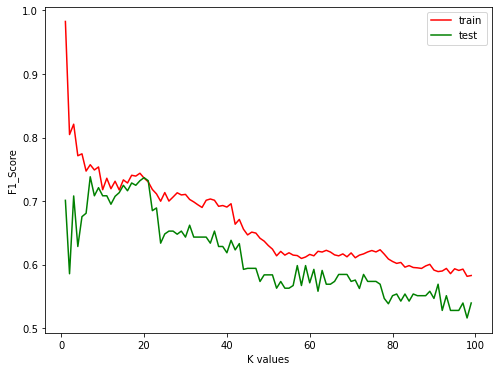

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
plt.figure(figsize = (8, 6))
plt.plot(K, train_f1, color='red', label = 'train')
plt.plot(K, test_f1, color = 'green', label = 'test')
plt.xlabel('K values')
plt.ylabel('F1_Score')
plt.legend()

We can see that for very low values of k the model is overfitting and for values aroung 20 the model is best fit while for
higher values of k it is underfitting.